In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("azureml_sales_data_12k.csv")
df.head()

,OrderID,OrderDateTime,ShipDateTime,Region,Channel,Category,ProductID,SalesRep,FinalRevenue
0,ORD-202203474,2024-12-10 08:38:00,2024-12-21 11:38:00,East,Partner,Fashion,FA-0012,K. Nguyen,439.99
1,ORD-202205577,2024-01-05 01:26:00,2024-01-05 10:26:00,London,Online,Grocery,GR-0085,L. Taylor,52.77
2,ORD-202203916,2024-09-09 14:23:00,2024-09-18 00:23:00,Scotland,Online,Fashion,FA-0044,I. Ahmed,95.37
3,ORD-202208091,2025-12-29 03:23:00,2026-01-08 20:23:00,West,Retail,Fashion,FA-0023,D. Smith,394.98
4,ORD-202211341,2024-06-21 11:06:00,2024-06-27 10:06:00,Scotland,Online,Toys,TY-0045,H. Wilson,248.07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        12036 non-null  object 
 1   OrderDateTime  12036 non-null  object 
 2   ShipDateTime   11916 non-null  object 
 3   Region         11855 non-null  object 
 4   Channel        12036 non-null  object 
 5   Category       12036 non-null  object 
 6   ProductID      11976 non-null  object 
 7   SalesRep       11555 non-null  object 
 8   FinalRevenue   11796 non-null  float64
dtypes: float64(1), object(8)
memory usage: 846.4+ KB


In [4]:
df['OrderDateTime'] = pd.to_datetime(df['OrderDateTime'])
df['ShipDateTime'] = pd.to_datetime(df['ShipDateTime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        12036 non-null  object        
 1   OrderDateTime  12036 non-null  datetime64[ns]
 2   ShipDateTime   11916 non-null  datetime64[ns]
 3   Region         11855 non-null  object        
 4   Channel        12036 non-null  object        
 5   Category       12036 non-null  object        
 6   ProductID      11976 non-null  object        
 7   SalesRep       11555 non-null  object        
 8   FinalRevenue   11796 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 846.4+ KB


In [6]:
df = df.dropna(subset=['FinalRevenue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11796 entries, 0 to 12035
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        11796 non-null  object        
 1   OrderDateTime  11796 non-null  datetime64[ns]
 2   ShipDateTime   11677 non-null  datetime64[ns]
 3   Region         11618 non-null  object        
 4   Channel        11796 non-null  object        
 5   Category       11796 non-null  object        
 6   ProductID      11736 non-null  object        
 7   SalesRep       11325 non-null  object        
 8   FinalRevenue   11796 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 921.6+ KB


In [8]:
df.SalesRep.unique(), df.Category.unique(), df.Channel.unique()

(array(['K. Nguyen', 'L. Taylor', 'I. Ahmed', 'D. Smith', 'H. Wilson',
        'B. Patel', 'C. Okafor', 'F. Garcia', 'A. Johnson', 'O. Rossi',
        "J. O'Connor", 'N. Ali', 'M. Evans', 'E. Chen', 'G. Brown', nan],
       dtype=object),
 array(['Fashion', 'Grocery', 'Toys', 'Beauty', 'Home', 'Sports',
        'Electronics', 'Automotive'], dtype=object),
 array(['Partner', 'Online', 'Retail', 'Wholesale', 'Direct'], dtype=object))

In [9]:
df['Year'] = df.OrderDateTime.dt.year
df['Month'] = df.OrderDateTime.dt.month
df['Quarter'] = df.OrderDateTime.dt.quarter
df['Hour'] = df.OrderDateTime.dt.hour

df['Time'] = pd.cut(
    df['Hour'], bins=[-1, 11, 17, 23],
    labels=['Morning', 'Afternoon', 'Evening']
)

In [10]:
df.Hour.unique()

array([ 8,  1, 14,  3, 11, 18,  7,  0, 19, 10,  5, 20, 23, 22, 16, 13,  2,
       15,  9, 12,  6, 21, 17,  4])

In [11]:
df.Time.unique()

['Morning', 'Afternoon', 'Evening']
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']

In [12]:
df.head()

,OrderID,OrderDateTime,ShipDateTime,Region,Channel,Category,ProductID,SalesRep,FinalRevenue,Year,Month,Quarter,Hour,Time
0,ORD-202203474,2024-12-10 08:38:00,2024-12-21 11:38:00,East,Partner,Fashion,FA-0012,K. Nguyen,439.99,2024,12,4,8,Morning
1,ORD-202205577,2024-01-05 01:26:00,2024-01-05 10:26:00,London,Online,Grocery,GR-0085,L. Taylor,52.77,2024,1,1,1,Morning
2,ORD-202203916,2024-09-09 14:23:00,2024-09-18 00:23:00,Scotland,Online,Fashion,FA-0044,I. Ahmed,95.37,2024,9,3,14,Afternoon
3,ORD-202208091,2025-12-29 03:23:00,2026-01-08 20:23:00,West,Retail,Fashion,FA-0023,D. Smith,394.98,2025,12,4,3,Morning
4,ORD-202211341,2024-06-21 11:06:00,2024-06-27 10:06:00,Scotland,Online,Toys,TY-0045,H. Wilson,248.07,2024,6,2,11,Morning


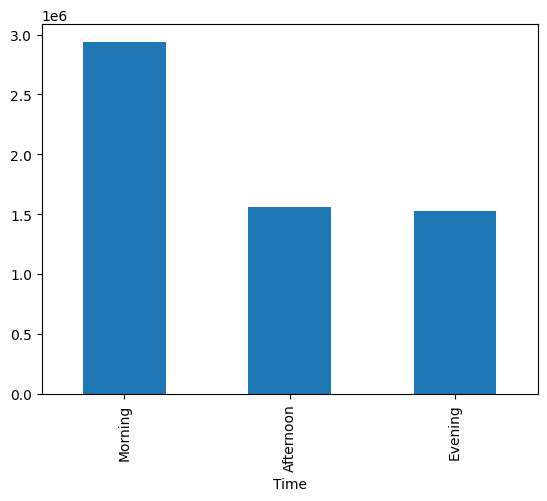

In [13]:
(df.groupby('Time', observed=True)['FinalRevenue']).sum().plot(kind='bar');

C:\Users\daniel\AppData\Local\Temp\ipykernel_18692\1895902720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby('Time')['FinalRevenue'].sum()


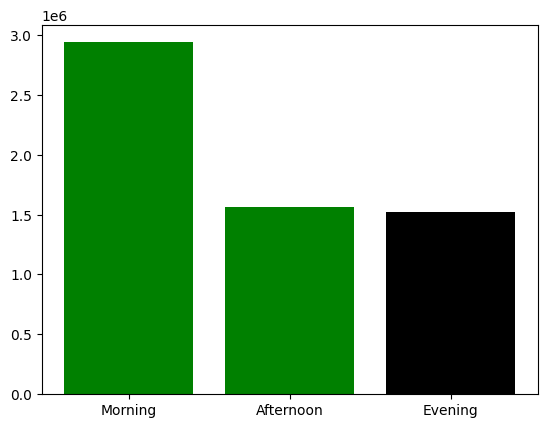

In [14]:
g = df.groupby('Time')['FinalRevenue'].sum()
color = ['green', 'green', 'black']
plt.bar(x=g.index, height=g.values, color=color)
plt.show()

<Axes: xlabel='Quarter'>

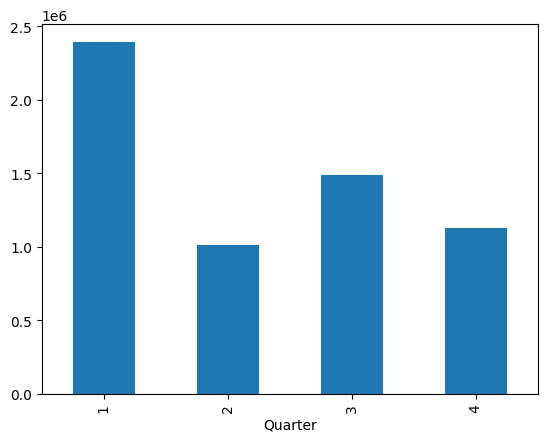

In [15]:
(df.groupby('Quarter')['FinalRevenue'].sum()).reindex([1,2,3,4]).plot(kind='bar')

<Axes: xlabel='Category'>

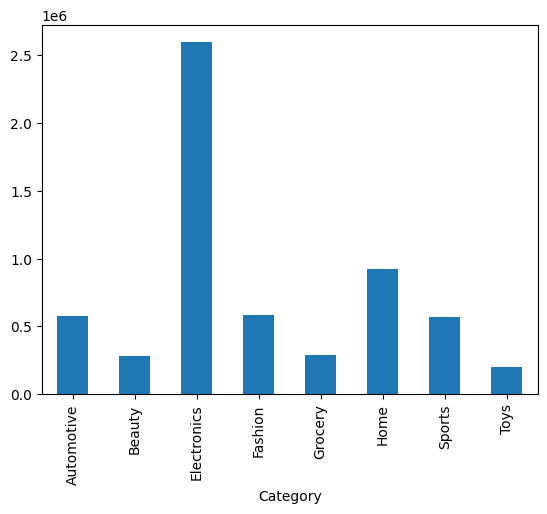

In [16]:
(df.groupby('Category')['FinalRevenue'].sum()).plot(kind='bar')

<Axes: xlabel='Region'>

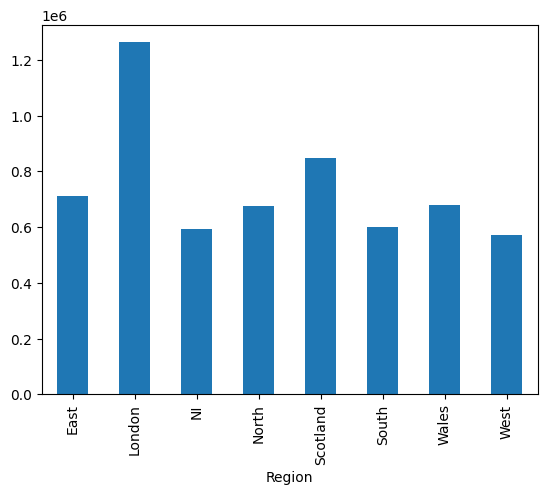

In [17]:
(df.groupby('Region')['FinalRevenue'].sum()).plot(kind='bar')

<Axes: xlabel='Channel'>

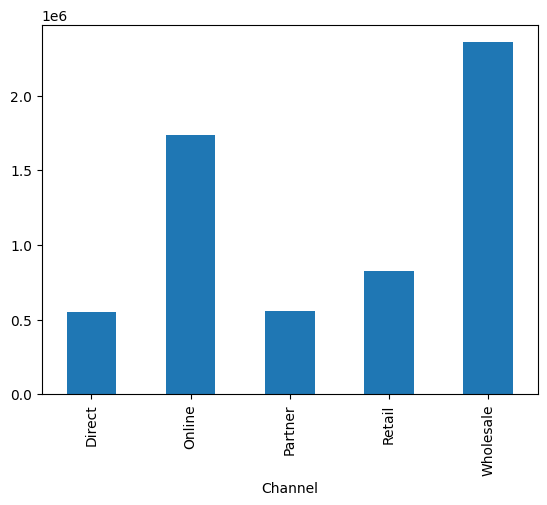

In [18]:
(df.groupby('Channel')['FinalRevenue'].sum()).plot(kind='bar')

In [19]:
df.columns

Index(['OrderID', 'OrderDateTime', 'ShipDateTime', 'Region', 'Channel',
       'Category', 'ProductID', 'SalesRep', 'FinalRevenue', 'Year', 'Month',
       'Quarter', 'Hour', 'Time'],
      dtype='object')

In [20]:
df = df.drop(columns=['SalesRep', 'ShipDateTime', 'ProductID', 'OrderID', 'OrderDateTime', 'Hour'], axis=1)

In [21]:
df['Region'] = df['Region'].fillna(df['Region'].mode().iloc[0])

In [22]:
df.Region.unique()

array(['East', 'London', 'Scotland', 'West', 'Wales', 'South', 'NI',
       'North'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11796 entries, 0 to 12035
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Region        11796 non-null  object  
 1   Channel       11796 non-null  object  
 2   Category      11796 non-null  object  
 3   FinalRevenue  11796 non-null  float64 
 4   Year          11796 non-null  int32   
 5   Month         11796 non-null  int32   
 6   Quarter       11796 non-null  int32   
 7   Time          11796 non-null  category
dtypes: category(1), float64(1), int32(3), object(3)
memory usage: 610.7+ KB


In [24]:
for key, val in df.items():
    if val.dtype != 'int':
        print(key)

Region
Channel
Category
FinalRevenue
Time


In [25]:
region_map = {'East':1, 'London':2, 'Scotland':3, 'West':4, 'Wales':5, 'South':6, 'NI':7,
       'North':8}

channel_map = {'Partner':1, 'Online':2, 'Retail':3, 'Wholesale':4, 'Direct':5}

cat_map = {'Fashion':1, 'Grocery':2, 'Toys':3, 'Beauty':4, 'Home':5, 'Sports':6,
       'Electronics':7, 'Automotive':8}


In [26]:
df['Time'] = df['Time'].cat.codes
df['Channel'] = df['Channel'].map(channel_map)
df['Category'] = df['Category'].map(cat_map)
df['Region'] = df['Region'].map(region_map)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11796 entries, 0 to 12035
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        11796 non-null  int64  
 1   Channel       11796 non-null  int64  
 2   Category      11796 non-null  int64  
 3   FinalRevenue  11796 non-null  float64
 4   Year          11796 non-null  int32  
 5   Month         11796 non-null  int32  
 6   Quarter       11796 non-null  int32  
 7   Time          11796 non-null  int8   
dtypes: float64(1), int32(3), int64(3), int8(1)
memory usage: 610.5 KB


# Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.metrics import root_mean_squared_error

In [39]:
df.head()

,Region,Channel,Category,FinalRevenue,Year,Month,Quarter,Time
0,1,1,1,439.99,2024,12,4,0
1,2,2,2,52.77,2024,1,1,0
2,3,2,1,95.37,2024,9,3,1
3,4,3,1,394.98,2025,12,4,0
4,3,2,3,248.07,2024,6,2,0


In [49]:
X = df.drop('FinalRevenue', axis=1)
y = df.FinalRevenue

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [75]:
reg = RandomForestRegressor()
model = reg.fit(X_train, y_train)

In [76]:
model.score(X_test, y_test)

-0.20154248937835506

In [77]:
y_hat = model.predict(X_test)
root_mean_squared_error(y_test, y_hat)

1501.6796953984726

In [65]:
linear_reg = LinearSVR(max_iter=100000000)
model2 = linear_reg.fit(X_train, y_train)

In [66]:
model2.score(X_test, y_test)

-0.005314738497258498